In [28]:
!rm -rf demo_dataset.zip

In [ ]:
!unzip TENNIS_DATASET.zip -d /content/demo_dataset.zip

In [1]:
import glob
import pandas as pd
import numpy as np

# Get CSV files list from a folder
# path = '/content/demo_dataset.zip/'
path = '../data/'
# Pattern match IMU data
imu_files = glob.glob(path + "SERVE_*-[0-9][0-9].csv")
# Pattern match camera data
cam_files = glob.glob(path + "SERVE_*_webcam.csv")

print(len(imu_files))
print(len(cam_files))
print(sorted(imu_files))

98
98
['../data/SERVE_20_03_2023_13-38-21.csv', '../data/SERVE_20_03_2023_13-41-50.csv', '../data/SERVE_20_03_2023_13-42-20.csv', '../data/SERVE_20_03_2023_13-42-47.csv', '../data/SERVE_20_03_2023_13-43-27.csv', '../data/SERVE_20_03_2023_13-43-51.csv', '../data/SERVE_20_03_2023_13-44-43.csv', '../data/SERVE_20_03_2023_13-45-12.csv', '../data/SERVE_20_03_2023_13-45-37.csv', '../data/SERVE_20_03_2023_13-45-58.csv', '../data/SERVE_20_03_2023_13-46-30.csv', '../data/SERVE_20_03_2023_13-46-59.csv', '../data/SERVE_20_03_2023_13-47-38.csv', '../data/SERVE_20_03_2023_13-48-06.csv', '../data/SERVE_20_03_2023_13-48-29.csv', '../data/SERVE_20_03_2023_13-49-16.csv', '../data/SERVE_20_03_2023_13-49-45.csv', '../data/SERVE_20_03_2023_13-52-33.csv', '../data/SERVE_20_03_2023_13-54-27.csv', '../data/SERVE_20_03_2023_13-54-53.csv', '../data/SERVE_20_03_2023_13-55-28.csv', '../data/SERVE_20_03_2023_13-57-24.csv', '../data/SERVE_20_03_2023_13-58-45.csv', '../data/SERVE_20_03_2023_14-00-45.csv', '../data/

In [2]:
labels = ['IMU','index','Xacc', 'Yacc', 'Zacc', 'Xori', 'Yori', 'Zori', 'Xmag', 'Ymag' , 'Zmag', 'Xgyro', 'Ygyro', 'Zgyro', 'Xrot','Yrot', 'Zrot' , 'Xlin' ,'Ylin', 'Zlin', 'Xgrav', 'Ygrav', 'Zgrav']

# Read each CSV file into DataFrame
# This creates a list of dataframes
df_imu = [pd.read_csv(file,skiprows=4,header=None,names=labels) for file in imu_files]

df_cam = [pd.read_csv(file,names=['index','x','y']) for file in cam_files]

labels = [pd.read_csv(file,skiprows=2,nrows=1,header=None).values[0][0] for file in imu_files]
labels = np.stack(labels, axis=0)

# Concatenate all DataFrames
df_full = []
for i in range(len(df_imu)):
    df_full.append(pd.merge(df_imu[i], df_cam[i], on='index'))

In [111]:
import pickle


with open('labels.pickle', 'wb') as handle:
    pickle.dump(labels, handle, protocol=pickle.HIGHEST_PROTOCOL)


with open('labels.pickle', 'rb') as handle:
    labels1 = pickle.load(handle)

In [3]:
print(labels.shape)

(98,)


In [3]:
df_full[0].head()

,IMU,index,Xacc,Yacc,Zacc,Xori,Yori,Zori,Xmag,Ymag,...,Yrot,Zrot,Xlin,Ylin,Zlin,Xgrav,Ygrav,Zgrav,x,y
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,-4,-6,5,63,1,60,8,46,...,0,0,0,0,0,-4,-7,5,0,0
2,1,1,21,-20,77,7,8,-45,0,0,...,0,0,-5,0,8,0,0,0,0,0
3,2,1,-4,-6,5,63,1,60,8,46,...,0,0,0,0,0,-4,-7,5,0,0
4,1,2,21,-20,77,7,8,-45,0,0,...,0,0,-5,0,8,0,0,0,0,0


In [17]:
df = df_full[50]

In [5]:
df.head()

,IMU,index,Xacc,Yacc,Zacc,Xori,Yori,Zori,Xmag,Ymag,...,Yrot,Zrot,Xlin,Ylin,Zlin,Xgrav,Ygrav,Zgrav,x,y
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,-4,-6,5,63,1,60,8,46,...,0,0,0,0,0,-4,-7,5,0,0
2,1,1,21,-20,77,7,8,-45,0,0,...,0,0,-5,0,8,0,0,0,0,0
3,2,1,-4,-6,5,63,1,60,8,46,...,0,0,0,0,0,-4,-7,5,0,0
4,1,2,21,-20,77,7,8,-45,0,0,...,0,0,-5,0,8,0,0,0,0,0


In [6]:
df.drop_duplicates()

,IMU,index,Xacc,Yacc,Zacc,Xori,Yori,Zori,Xmag,Ymag,...,Yrot,Zrot,Xlin,Ylin,Zlin,Xgrav,Ygrav,Zgrav,x,y
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,-4,-6,5,63,1,60,8,46,...,0,0,0,0,0,-4,-7,5,0,0
2,1,1,21,-20,77,7,8,-45,0,0,...,0,0,-5,0,8,0,0,0,0,0
3,2,1,-4,-6,5,63,1,60,8,46,...,0,0,0,0,0,-4,-7,5,0,0
4,1,2,21,-20,77,7,8,-45,0,0,...,0,0,-5,0,8,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,2,146,-22,-8,11,23,-51,9,43,16,...,0,0,-15,-6,5,-7,-1,5,-354,-269
294,1,147,120,32,82,-40,30,-1,4,-1,...,14,1,5,-8,0,0,0,0,0,0
295,2,147,-24,-8,12,20,-51,7,47,12,...,0,0,-16,-7,6,-7,0,5,0,0
296,1,148,120,32,82,-40,30,-1,3,0,...,14,1,5,-8,0,0,0,0,0,0


In [7]:
dataset = []
for i in range(len(df_full)):
    df = df_full[i]
    df_imu1 = df.loc[df['IMU'] == 1]
    df_imu1.columns = ['IMU','index','X1acc', 'Y1acc', 'Z1acc', 'X1ori', 'Y1ori', 'Z1ori', 'X1mag', 'Y1mag' , 'Z1mag', 'X1gyro', 'Y1gyro', 'Z1gyro', 'X1rot','Y1rot', 'Z1rot' , 'X1lin' ,'Y1lin', 'Z1lin', 'X1grav', 'Y1grav', 'Z1grav', 'Xcam', 'Ycam']
    df_imu2 = df.loc[df['IMU'] == 2]
    df_imu2.columns = ['IMU','index','X2acc', 'Y2acc', 'Z2acc', 'X2ori', 'Y2ori', 'Z2ori', 'X2mag', 'Y2mag' , 'Z2mag', 'X2gyro', 'Y2gyro', 'Z2gyro', 'X2rot','Y2rot', 'Z2rot' , 'X2lin' ,'Y2lin', 'Z2lin', 'X2grav', 'Y2grav', 'Z2grav', 'Xcam', 'Ycam']
    
    merged_df = pd.merge(df_imu1, df_imu2, on='index')
    merged_df.drop(columns=['index', 'IMU_x'], inplace=True)
    dataset.append(merged_df)

In [8]:
print(np.cov(dataset[0]['X1acc'], dataset[0]['X1lin']))

[[2013.97542173  -13.18107201]
 [ -13.18107201    8.78904408]]


In [7]:
dataset[0]['X1lin']

0    0
1   -5
2   -5
3   -5
4   -5
Name: X1lin, dtype: int64

In [18]:
dataset_np = np.array(list(map(lambda x: x.to_numpy(), dataset)))

print(dataset_np.shape)
#racket  is 2
#hand is 1 

(98, 149, 47)


In [69]:
df.drop_duplicates()

,IMU,index,Xacc,Yacc,Zacc,Xori,Yori,Zori,Xmag,Ymag,...,Yrot,Zrot,Xlin,Ylin,Zlin,Xgrav,Ygrav,Zgrav,x,y
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,-2,-8,5,66,-8,43,-1,45,...,0,0,0,0,0,-2,-7,5,0,0
2,1,1,26,-39,-88,2,21,-44,0,0,...,0,0,-4,-2,8,0,0,0,0,0
3,2,1,-2,-8,5,66,-8,43,-1,45,...,0,0,0,0,0,-2,-7,5,0,0
4,1,2,26,-39,-88,2,21,-44,0,0,...,0,0,-4,-2,8,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,2,146,-21,-3,-17,-21,7,-84,-39,-11,...,0,0,-23,-2,-8,2,-1,-9,0,0
294,1,147,78,-6,76,-25,39,-9,0,0,...,-1,0,0,-9,2,0,0,0,0,0
295,2,147,-19,-4,-17,-20,0,-84,-39,-11,...,0,0,-20,-2,-8,0,-1,-9,0,0
296,1,148,78,-6,76,-25,39,-9,0,0,...,-1,0,0,-9,2,0,0,0,0,0


In [70]:
dataset = []
for i in range(len(df_full)):
    df = df_full[i]
    df_imu1 = df.loc[df['IMU'] == 1]
    df_imu1.columns = ['IMU','index','X1acc', 'Y1acc', 'Z1acc', 'X1ori', 'Y1ori', 'Z1ori', 'X1mag', 'Y1mag' , 'Z1mag', 'X1gyro', 'Y1gyro', 'Z1gyro', 'X1rot','Y1rot', 'Z1rot' , 'X1lin' ,'Y1lin', 'Z1lin', 'X1grav', 'Y1grav', 'Z1grav', 'Xcam', 'Ycam']
    df_imu2 = df.loc[df['IMU'] == 2]
    df_imu2.columns = ['IMU','index','X2acc', 'Y2acc', 'Z2acc', 'X2ori', 'Y2ori', 'Z2ori', 'X2mag', 'Y2mag' , 'Z2mag', 'X2gyro', 'Y2gyro', 'Z2gyro', 'X2rot','Y2rot', 'Z2rot' , 'X2lin' ,'Y2lin', 'Z2lin', 'X2grav', 'Y2grav', 'Z2grav', 'Xcam', 'Ycam']
    
    merged_df = pd.merge(df_imu1, df_imu2, on='index')
    merged_df.drop(columns=['index', 'IMU_x'], inplace=True)
    dataset.append(merged_df)

In [12]:
dataset[0].head()
print(dataset[0].columns)

Index(['X1acc', 'Y1acc', 'Z1acc', 'X1ori', 'Y1ori', 'Z1ori', 'X1mag', 'Y1mag',
       'Z1mag', 'X1gyro', 'Y1gyro', 'Z1gyro', 'X1rot', 'Y1rot', 'Z1rot',
       'X1lin', 'Y1lin', 'Z1lin', 'X1grav', 'Y1grav', 'Z1grav', 'Xcam_x',
       'Ycam_x', 'IMU_y', 'X2acc', 'Y2acc', 'Z2acc', 'X2ori', 'Y2ori', 'Z2ori',
       'X2mag', 'Y2mag', 'Z2mag', 'X2gyro', 'Y2gyro', 'Z2gyro', 'X2rot',
       'Y2rot', 'Z2rot', 'X2lin', 'Y2lin', 'Z2lin', 'X2grav', 'Y2grav',
       'Z2grav', 'Xcam_y', 'Ycam_y'],
      dtype='object')


In [72]:
dataset_np = np.array(list(map(lambda x: x.to_numpy(), dataset)))

print(dataset_np.shape)
#racket  is 2
#hand is 1 

(98, 149, 47)


In [107]:
import pickle


with open('filename.pickle', 'wb') as handle:
    pickle.dump(dataset_np, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('filename.pickle', 'rb') as handle:
    dataset_np1 = pickle.load(handle)

## ACCELERATION

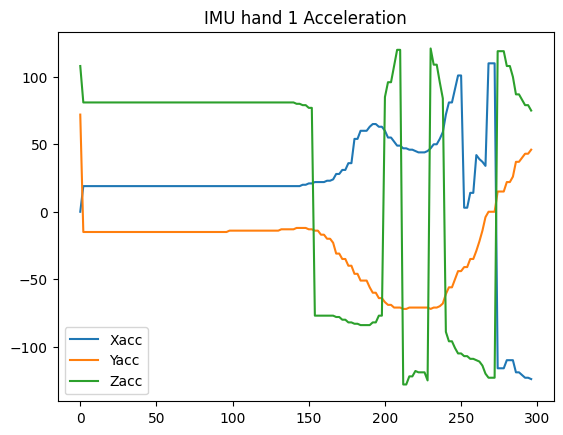

In [18]:
import matplotlib.pyplot as plt

IMU = 1

plt.plot(df.loc[df['IMU'] == IMU]['Xacc'], label='Xacc')
plt.plot(df.loc[df['IMU'] == IMU]['Yacc'], label='Yacc')
plt.plot(df.loc[df['IMU'] == IMU]['Zacc'], label='Zacc')
plt.title(f'IMU hand {IMU} Acceleration')
plt.legend()
plt.show()

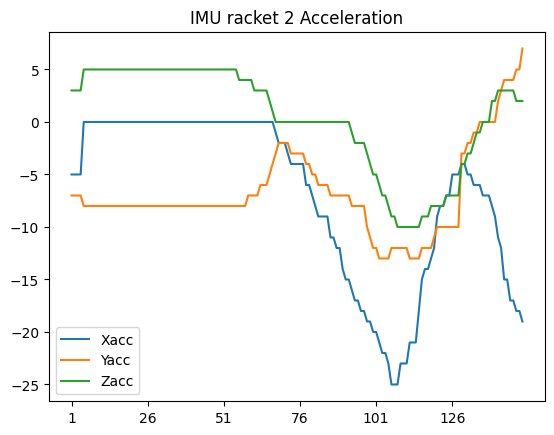

In [36]:
IMU = 2

plt.plot(df.loc[df['IMU'] == IMU]['Xacc'], label='Xacc')
plt.plot(df.loc[df['IMU'] == IMU]['Yacc'], label='Yacc')
plt.plot(df.loc[df['IMU'] == IMU]['Zacc'], label='Zacc')
plt.xticks(ticks=np.arange(0, 300, step=50),labels=np.arange(0, 150, step=25))
plt.title(f'IMU racket {IMU} Acceleration')
plt.legend()
plt.show()

##GYROSCOPE

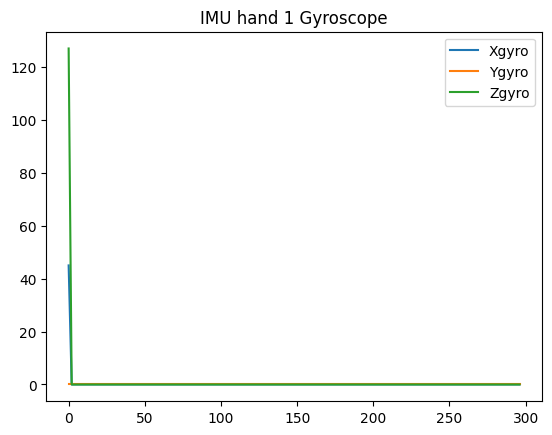

In [24]:
import matplotlib.pyplot as plt

IMU = 1

plt.plot(df.loc[df['IMU'] == IMU]['Xgyro'], label='Xgyro')
plt.plot(df.loc[df['IMU'] == IMU]['Ygyro'], label='Ygyro')
plt.plot(df.loc[df['IMU'] == IMU]['Zgyro'], label='Zgyro')
plt.title(f'IMU hand {IMU} Gyroscope')
plt.legend()
plt.show()

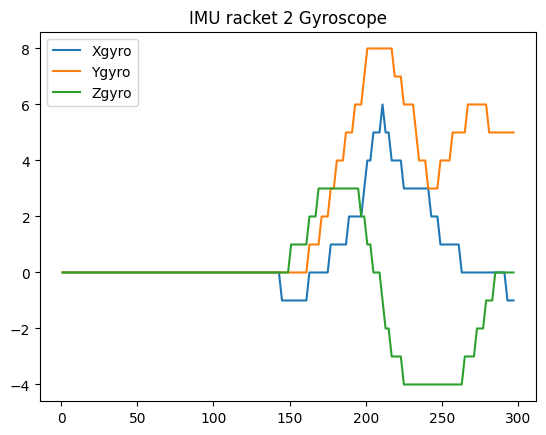

In [23]:
IMU = 2

plt.plot(df.loc[df['IMU'] == IMU]['Xgyro'], label='Xgyro')
plt.plot(df.loc[df['IMU'] == IMU]['Ygyro'], label='Ygyro')
plt.plot(df.loc[df['IMU'] == IMU]['Zgyro'], label='Zgyro')
plt.title(f'IMU racket {IMU} Gyroscope')
plt.legend()
plt.show()

## Linear

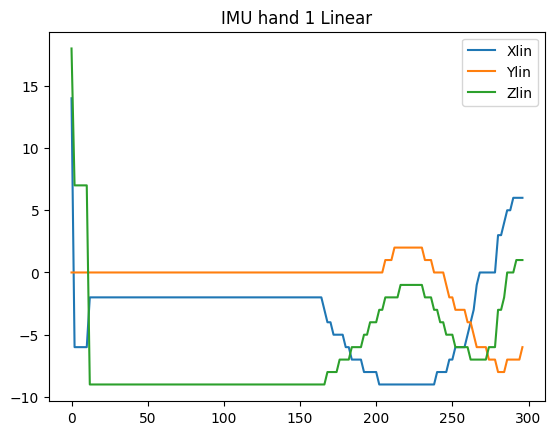

In [20]:
import matplotlib.pyplot as plt

IMU = 1

plt.plot(df.loc[df['IMU'] == IMU]['Xlin'], label='Xlin')
plt.plot(df.loc[df['IMU'] == IMU]['Ylin'], label='Ylin')
plt.plot(df.loc[df['IMU'] == IMU]['Zlin'], label='Zlin')
plt.title(f'IMU hand {IMU} Linear')
plt.legend()
plt.show()

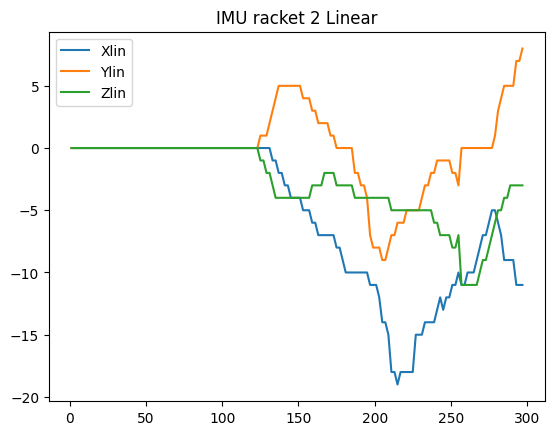

In [22]:
IMU = 2

plt.plot(df.loc[df['IMU'] == IMU]['Xlin'], label='Xlin')
plt.plot(df.loc[df['IMU'] == IMU]['Ylin'], label='Ylin')
plt.plot(df.loc[df['IMU'] == IMU]['Zlin'], label='Zlin')
plt.title(f'IMU racket {IMU} Linear')
plt.legend()
plt.show()

## Some stats to analyse our data

In [ ]:
# (mean and std)
# gyro in hand is 0 
# grav in hand is 0 
# rot in rackette is 0

In [19]:
dataset_np.shape

(98, 149, 47)

In [20]:
np.mean(dataset_np,axis=0).shape

(149, 47)

In [22]:
mean_each_timestep = np.mean(dataset_np,axis=0)

In [23]:
mean_each_serve=np.mean(mean_each_timestep,axis=0)

In [32]:
print(np.atleast_2d(mean_each_serve).shape)

(1, 47)


In [33]:
df = pd.DataFrame(np.atleast_2d(mean_each_serve), columns= ['X1acc', 'Y1acc', 'Z1acc', 'X1ori', 'Y1ori', 'Z1ori', 'X1mag', 'Y1mag','Z1mag', 'X1gyro', 'Y1gyro', 'Z1gyro', 'X1rot', 'Y1rot', 'Z1rot','X1lin', 'Y1lin', 'Z1lin', 'X1grav', 'Y1grav', 'Z1grav', 'Xcam_x','Ycam_x', 'IMU_y', 'X2acc', 'Y2acc', 'Z2acc', 'X2ori', 'Y2ori', 'Z2ori','X2mag', 'Y2mag', 'Z2mag', 'X2gyro', 'Y2gyro', 'Z2gyro', 'X2rot','Y2rot', 'Z2rot', 'X2lin', 'Y2lin', 'Z2lin', 'X2grav', 'Y2grav','Z2grav', 'Xcam_y', 'Ycam_y'])
df.head()

,X1acc,Y1acc,Z1acc,X1ori,Y1ori,Z1ori,X1mag,Y1mag,Z1mag,X1gyro,...,Y2rot,Z2rot,X2lin,Y2lin,Z2lin,X2grav,Y2grav,Z2grav,Xcam_y,Ycam_y
0,33.988837,-20.401794,-9.150938,-1.556705,11.018902,29.598,0.714628,-0.110875,-0.018354,-0.005684,...,0.0,0.0,-4.328311,-0.681414,-1.560608,-0.407273,-6.220449,3.133612,16.902548,1.864471


In [34]:
std_each_timestep = np.std(dataset_np,axis=0)

In [35]:
std_each_serve=np.std(mean_each_timestep,axis=0)

In [36]:
df = pd.DataFrame(np.atleast_2d(std_each_serve), columns= ['X1acc', 'Y1acc', 'Z1acc', 'X1ori', 'Y1ori', 'Z1ori', 'X1mag', 'Y1mag','Z1mag', 'X1gyro', 'Y1gyro', 'Z1gyro', 'X1rot', 'Y1rot', 'Z1rot','X1lin', 'Y1lin', 'Z1lin', 'X1grav', 'Y1grav', 'Z1grav', 'Xcam_x','Ycam_x', 'IMU_y', 'X2acc', 'Y2acc', 'Z2acc', 'X2ori', 'Y2ori', 'Z2ori','X2mag', 'Y2mag', 'Z2mag', 'X2gyro', 'Y2gyro', 'Z2gyro', 'X2rot','Y2rot', 'Z2rot', 'X2lin', 'Y2lin', 'Z2lin', 'X2grav', 'Y2grav','Z2grav', 'Xcam_y', 'Ycam_y'])
df.head()

,X1acc,Y1acc,Z1acc,X1ori,Y1ori,Z1ori,X1mag,Y1mag,Z1mag,X1gyro,...,Y2rot,Z2rot,X2lin,Y2lin,Z2lin,X2grav,Y2grav,Z2grav,Xcam_y,Ycam_y
0,7.084107,12.437498,15.324313,10.125362,5.898355,12.393656,1.560243,0.758519,1.13544,0.069151,...,0.0,0.0,4.448803,1.481029,1.313565,1.301334,1.542395,1.877082,14.012472,9.567553
